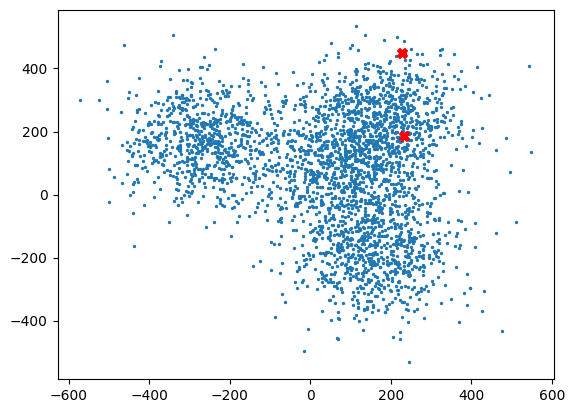

In [8]:
from sklearn.datasets import make_blobs
import matplotlib
from matplotlib import pyplot as plt
import random
import math
import numpy as np
import math
import os
import imageio.v2 as imageio
from IPython.display import Image
from tqdm import tqdm

# gera pontos de forma aleatória e separa em duas listas
DATA, _ = make_blobs(n_samples=3000, centers=4, center_box=(-300, 300), cluster_std=100)
x = []
y = []
for d in DATA:
    x.append(tuple(d)[0])
    y.append(tuple(d)[1])

# inicialização dos centróides
c1 = (random.randint(math.floor(np.min(x)), math.floor(np.max(x))), random.randint(math.floor(np.min(y)), math.floor(np.max(y))))
c2 = (random.randint(math.floor(np.min(x)), math.floor(np.max(x))), random.randint(math.floor(np.min(y)), math.floor(np.max(y))))
plt.scatter(x=x, y=y, s=2)
plt.scatter(x=c1[0], y=c1[1], marker='X', s=50, c='red')
plt.scatter(x=c2[0], y=c2[1], marker='X', s=50, c='red')
plt.show()

In [9]:
# configuração para o matplotlib não plotar os gráficos
matplotlib.use('Agg')

# lista de coordenadas para fazer os gráficos
cluster_c1_x = []
cluster_c1_y = []
cluster_c2_x = []
cluster_c2_y = []

# lista com os nomes dos arquivos
names = []

for i in tqdm(range(35)):
    # criação dos clusters vazios (sem pontos)
    cluster_c1 = []
    cluster_c2 = []

    # salva os gráficos em imagens para criar um gif
    fig, ax = plt.subplots()
    if i == 0:
        # valores do gráfico
        ax.scatter(x=x, y=y, s=1, color=(0.0, 1.0, 0.0, 1.0))
        # centróide 1
        #ax.scatter(x=c1[0], y=c1[1], marker='X', s=1, c='red')
        # centróide 2
        #ax.scatter(x=c2[0], y=c2[1], marker='X', s=1, c='blue')
    else:
        # valores do gráfico
        ax.scatter(x=cluster_c1_x, y=cluster_c1_y, s=1, color=(1.0, 0.0, 0.0, 1))
        ax.scatter(x=cluster_c2_x, y=cluster_c2_y, s=1, color=(0.0, 0.0, 1.0, 1))
        # centróide 2
        ax.scatter(x=c2[0], y=c2[1], marker='X', s=75, color=(0.0, 0.0, 0.5, 1))
        # centróide 1
        ax.scatter(x=c1[0], y=c1[1], marker='X', s=75, color=(0.5, 0.0, 0.0, 1))
        

    fig.savefig(f'images/{i + 1}.png')
    names.append(f'{i + 1}.png')
    matplotlib.pyplot.close()

    # calcula a distancia dos pontos em relação aos centróides
    sum_c1 = 0
    for j in range(len(x)):
        P = (x[j], y[j])

        c1_distance = math.sqrt(math.pow(P[0] - c1[0], 2) + math.pow(P[1] - c1[1], 2))
        c2_distance = math.sqrt(math.pow(P[0] - c2[0], 2) + math.pow(P[1] - c2[1], 2))
        
        # atualiza os clusters
        if c1_distance > c2_distance:
            cluster_c2.append(P)
            cluster_c2_x.append(P[0])
            cluster_c2_y.append(P[1])
        else:
            cluster_c1.append(P)
            cluster_c1_x.append(P[0])
            cluster_c1_y.append(P[1])
            sum_c1 += c1_distance
    
    # atualiza a posição de c1
    sum_x1 = 0
    sum_x2 = 0
    for i in range(len(cluster_c1)):
        sum_x1 = sum_x1 + cluster_c1[i][0]
        sum_x2 = sum_x2 + cluster_c1[i][1]
    if len(cluster_c1) != 0:
        c1 = (sum_x1 / len(cluster_c1), sum_x2 / len(cluster_c1))
 
    # atualiza a posição de c2
    sum_x1 = 0
    sum_x2 = 0
    for i in range(len(cluster_c2)):
        sum_x1 = sum_x1 + cluster_c2[i][0]
        sum_x2 = sum_x2 + cluster_c2[i][1]
    if len(cluster_c2) != 0:
        c2 = (sum_x1 / len(cluster_c2), sum_x2 / len(cluster_c2))
    

print(cluster_c1)

100%|██████████| 35/35 [00:19<00:00,  1.80it/s]

[(113.17179566908524, -115.73816289713423), (220.65065106353077, -141.75415359140163), (241.5392171404836, -189.96533373846563), (153.95663722688036, -116.34640760285859), (28.696464366034405, -264.7946302721997), (130.98887893755006, 16.848509891103063), (177.71621910199434, -132.4175714466707), (114.9740201621731, -297.1246627432246), (25.801847775055705, -101.62552307659665), (201.77816177518054, 99.41507533475979), (150.1515024141393, -80.8848858495241), (183.41103900158785, -160.107779598565), (45.73144206697714, -57.728454033320105), (98.72202376217166, 31.029258602337137), (58.231372585697414, -192.83665459820878), (238.67936923698656, -68.7067455378267), (38.10470771723896, -86.75689795598873), (77.35969686038099, -299.4357238440311), (29.78303217276742, -4.128944026143515), (55.77937319924442, -65.15184104988428), (103.24543426390763, -194.49563259815872), (85.37567592403965, -194.52172279458577), (28.609393084824177, -253.34875708959382), (-10.353589345083805, -220.5322424635

In [10]:
path = 'images/'
extension = '.png'
duration = 650

# cria uma lista de imagens
images = []
for image in names:
    image_path = os.path.join(path, image)
    images.append(imageio.imread(image_path))

# cria o gif
output_path = os.path.join('.', "output.gif")
imageio.mimsave(output_path, images, duration=duration)



# caminho da pasta a ser esvaziada
pasta = './images'

# itera sobre todos os arquivos na pasta
for arquivo in os.listdir(pasta):
    caminho_arquivo = os.path.join(pasta, arquivo)
    if os.path.isfile(caminho_arquivo):
        # exclui o arquivo
        os.remove(caminho_arquivo)

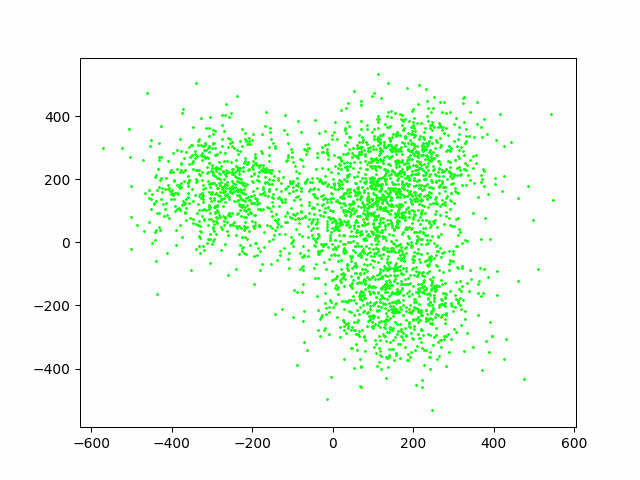

In [18]:
# abre o gif
Image(filename='./output.gif')

In [12]:
cluster_c1

[(113.17179566908524, -115.73816289713423),
 (220.65065106353077, -141.75415359140163),
 (241.5392171404836, -189.96533373846563),
 (153.95663722688036, -116.34640760285859),
 (28.696464366034405, -264.7946302721997),
 (130.98887893755006, 16.848509891103063),
 (177.71621910199434, -132.4175714466707),
 (114.9740201621731, -297.1246627432246),
 (25.801847775055705, -101.62552307659665),
 (201.77816177518054, 99.41507533475979),
 (150.1515024141393, -80.8848858495241),
 (183.41103900158785, -160.107779598565),
 (45.73144206697714, -57.728454033320105),
 (98.72202376217166, 31.029258602337137),
 (58.231372585697414, -192.83665459820878),
 (238.67936923698656, -68.7067455378267),
 (38.10470771723896, -86.75689795598873),
 (77.35969686038099, -299.4357238440311),
 (29.78303217276742, -4.128944026143515),
 (55.77937319924442, -65.15184104988428),
 (103.24543426390763, -194.49563259815872),
 (85.37567592403965, -194.52172279458577),
 (28.609393084824177, -253.34875708959382),
 (-10.353589345